In [12]:
import sys
from pathlib import Path
REPO_PATH = Path.home() / "workspace/jetpointnet"
SCRIPT_PATH = REPO_PATH / "python_scripts"
sys.path.append(str(SCRIPT_PATH))
import os

from data_processing.jets.preprocessing_header import AWK_SAVE_LOC, MAX_SAMPLE_LENGTH, LEN, MIN_TRACK_CELL_HITS, LEN_OUTPUT_DIRECTORY_NAME, LEN_DATASET_NAME, prefix_match, prefix_to_set
from data_processing.jets.jets_max_sample_length import find_global_max_sample_length

import re
from pathlib import Path
import json
import re
import matplotlib.pyplot as plt
import numpy as np


In [13]:
find_global_max_sample_length()

split loop:   0%|          | 0/3 [00:00<?, ?it/s]

Processing train:   0%|          | 0/341 [00:00<?, ?it/s]

Processing val:   0%|          | 0/342 [00:00<?, ?it/s]

Processing test:   0%|          | 0/342 [00:00<?, ?it/s]

In [14]:
json_loc = Path(AWK_SAVE_LOC(LEN)).parent / "metadata" / "sample_length_calcs.json"
with open(json_loc, 'r') as f:
    results = json.load(f)

In [15]:
len_list = []
max_list = []
for dir in ['test', 'train', 'val']:
    for lengths in results[dir]:
        len_list.extend(lengths[0])
        max_list.append(max(lengths[0]))

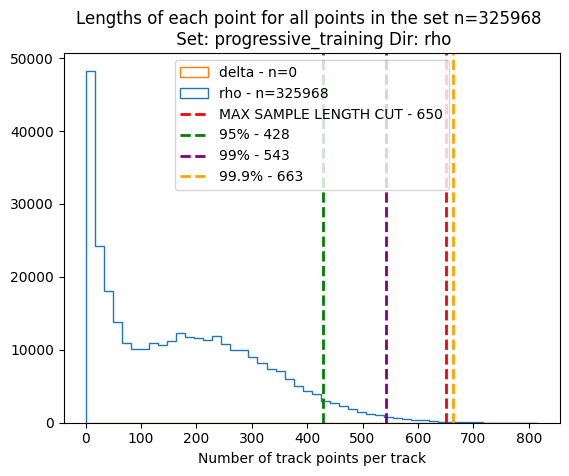

In [17]:
plt.title(f"Lengths of each point for all points in the set n={len(len_list)} \n Set: {LEN_DATASET_NAME} Dir: {LEN_OUTPUT_DIRECTORY_NAME}")

percentile_95 = int(np.percentile(len_list, 95))
percentile_99 = int(np.percentile(len_list, 99))
percentile_99_9 = int(np.percentile(len_list, 99.9))

lengths_dict = {i: [] for i in prefix_to_set.values()}

for key, value in results.items():
    for i in value:
        set_name = prefix_to_set[i[1][:len('user.mswiatlo.39955613')]]
        lengths_dict[set_name].extend(i[0])

rates = lengths_dict.values()
included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(lengths_dict[i])}" for i in lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(rates, label=labels, bins=50, histtype='step', fill=False, density=False)
plt.xlabel("Number of tracks")
plt.xlabel("Number of track points per track")
plt.axvline(x=MAX_SAMPLE_LENGTH, color='red', linestyle='--', linewidth=2, label=f'MAX SAMPLE LENGTH CUT - {MAX_SAMPLE_LENGTH}')
plt.axvline(x=percentile_95, color='green', linestyle='--', linewidth=2, label=f'95% - {percentile_95}')
plt.axvline(x=percentile_99, color='purple', linestyle='--', linewidth=2, label=f'99% - {percentile_99}')
plt.axvline(x=percentile_99_9, color='orange', linestyle='--', linewidth=2, label=f'99.9% - {percentile_99_9}')

plt.legend()
plt.show()

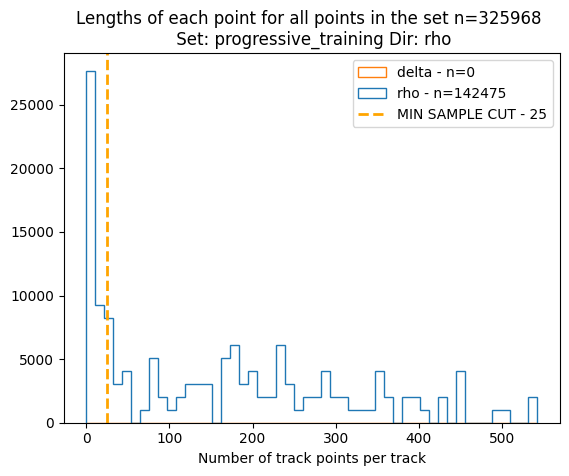

In [18]:
plt.title(f"Lengths of each point for all points in the set n={len(len_list)} \n Set: {LEN_DATASET_NAME} Dir: {LEN_OUTPUT_DIRECTORY_NAME}")

percentile_95 = int(np.percentile(len_list, 95))
percentile_99 = int(np.percentile(len_list, 99))
percentile_99_9 = int(np.percentile(len_list, 99.9))

lengths_dict = {i: [] for i in prefix_to_set.values()}

for key, value in results.items():
    for event in value:
        set_name = prefix_to_set[i[1][:len('user.mswiatlo.39955613')]]
        lengths_dict[set_name].extend(i[2])

rates = lengths_dict.values()
included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(lengths_dict[i])}" for i in lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(rates, label=labels, bins=50, histtype='step', fill=False, density=False)
plt.xlabel("Number of tracks")
plt.xlabel("Number of track points per track")
plt.axvline(x=MIN_TRACK_CELL_HITS, color='orange', linestyle='--', linewidth=2, label=f'MIN SAMPLE CUT - {MIN_TRACK_CELL_HITS}')

plt.legend()
plt.show()

In [19]:
lengths_dict = {i: [] for i in prefix_to_set.keys()}

for key, value in results.items():
    for i in value:
        lengths_dict[prefix_to_set[i[1][:len('user.mswiatlo.39955613')]]].extend(i[0])

KeyError: 'rho'

In [ ]:


rates = lengths_dict.values()
included_dict = {True: "Included",
                 False: "Excluded"}
labels = [f"{i} - n={len(lengths_dict[i])} - {included_dict[i in INCLUDE_SETS_TO_NPZ]} " for i in lengths_dict.keys()]
#plt.hist(rates, label=labels, bins=50, histtype='step', stacked=True, fill=False)
plt.hist(rates, label=labels, bins=50, histtype='step', fill=False, density=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.yscale('log')
plt.title("Dense track complexity hist with $\Delta R =0.2$")
plt.xlabel("Number of track points")


plt.axvline(x=MAX_SAMPLE_LENGTH, color='red', linestyle='--', linewidth=2, label=f'MAX SAMPLE LENGTH CUT - {MAX_SAMPLE_LENGTH}')
plt.legend()

for i in lengths_dict.keys():
    print(f"{i} 95th percentile: {np.percentile(lengths_dict[i], 95) if  len(lengths_dict[i]) != 0 else 'Excluded'}")


print(f"Max Sample Length is {max([max(lengths_dict[f'JZ{i}']) for i in range(7) if len(lengths_dict[f'JZ{i}']) != 0])}")
print(f"Number of included files: {sum([len(lengths_dict[f'JZ{i}']) for i in range(7)])}")
#print(f"{(sum(awk_file_numbers)-sum([len(lengths_dict[f'JZ{i}']) for i in range(7)]))} files EXLUDED from last sample length search")